In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats
from scipy.stats import norm

In [2]:
test_df = pd.read_csv("Test_dataset.csv")
train_df = pd.read_csv("Train_dataset.csv")

In [3]:
test_df.head(5)

,people_ID,Region,Gender,Designation,Name,Married,Children,Occupation,Mode_transport,cases/1M,...,Platelets,HBB,d-dimer,Heart rate,HDL cholesterol,Charlson Index,Blood Glucose,Insurance,salary,FT/month
0,5942,Delhi,Female,Mrs,smt rekha prajapat,YES,2,Driver,Public,4,...,153,196,240,85,53,17,3,3900000,1300000,1
1,18664,Delhi,Male,Mr,nirmal,YES,2,Legal,Walk,4,...,95,138,241,81,61,2,5,1800000,1300000,1
2,5603,Delhi,Female,Mrs,pinky,YES,2,Sales,Car,4,...,40,166,236,88,47,24,3,5000000,2000000,2
3,5649,Delhi,Female,Mrs,pooja @aafrin,YES,2,Sales,Car,4,...,78,83,211,87,52,13,6,3100000,600000,2
4,5099,Delhi,Female,Mrs,anjali,YES,2,Business,Car,4,...,109,207,312,94,68,39,5,2300000,1500000,1


In [4]:
train_df.head(5)

,people_ID,Region,Gender,Designation,Name,Married,Children,Occupation,Mode_transport,cases/1M,...,HBB,d-dimer,Heart rate,HDL cholesterol,Charlson Index,Blood Glucose,Insurance,salary,FT/month,Infect_Prob
0,1,Bhubaneshwar,Female,Mrs,mansi,YES,1.0,Farmer,Public,2,...,93.0,233.0,82.0,58.0,27,7,3600000.0,1300000,2.0,49.135010
1,2,Bhubaneshwar,Female,Mrs,riya masi,YES,2.0,Farmer,Walk,2,...,56.0,328.0,89.0,68.0,5,6,1600000.0,400000,1.0,51.147880
2,3,Bhubaneshwar,Female,Mrs,sunita,NO,1.0,Cleaner,Public,2,...,137.0,213.0,77.0,43.0,40,6,3400000.0,900000,1.0,73.224000
3,4,Bhubaneshwar,Female,Mrs,anjali @ babli,YES,1.0,Driver,Car,2,...,167.0,275.0,64.0,60.0,27,7,700000.0,2300000,1.0,48.779225
4,5,Bhubaneshwar,Female,Mrs,champa karketta,NO,2.0,Manufacturing,Car,2,...,153.0,331.0,71.0,64.0,32,7,3200000.0,1100000,1.0,87.868800


In [5]:
train_df.info()
print ('----------------------------------------------')
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10714 entries, 0 to 10713
Data columns (total 28 columns):
people_ID                 10714 non-null int64
Region                    10714 non-null object
Gender                    10714 non-null object
Designation               10714 non-null object
Name                      10694 non-null object
Married                   10714 non-null object
Children                  10403 non-null float64
Occupation                9967 non-null object
Mode_transport            10711 non-null object
cases/1M                  10714 non-null int64
Deaths/1M                 10714 non-null int64
comorbidity               10488 non-null object
Age                       10714 non-null int64
Coma score                10714 non-null int64
Pulmonary score           10714 non-null object
cardiological pressure    10617 non-null object
Diuresis                  9998 non-null float64
Platelets                 9790 non-null float64
HBB                       10698 

C:\Users\indra\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


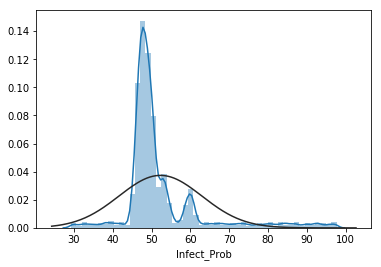

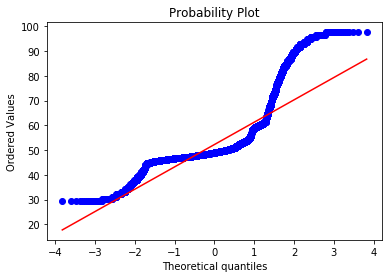

In [6]:
sns.distplot(train_df['Infect_Prob'], fit=norm);
fig = plt.figure()
res = stats.probplot(train_df['Infect_Prob'], plot=plt)

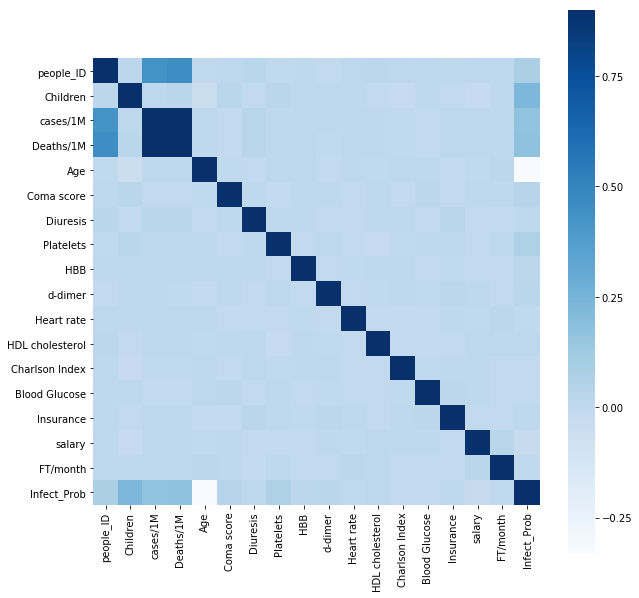

In [7]:
corr = train_df.corr()
plt.subplots(figsize=(10,10))
sns.heatmap(corr, vmax=0.9, cmap="Blues", square=True)

C:\Users\indra\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


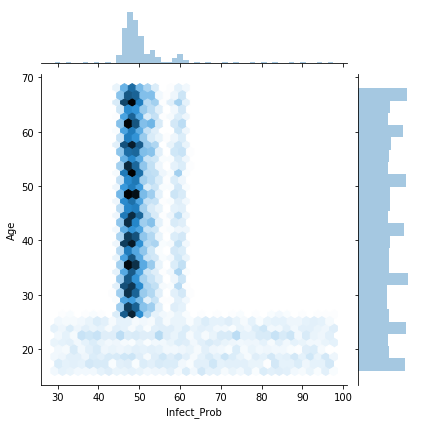

In [8]:
sns.jointplot(x="Infect_Prob", y="Age", kind='hex', data=train_df)

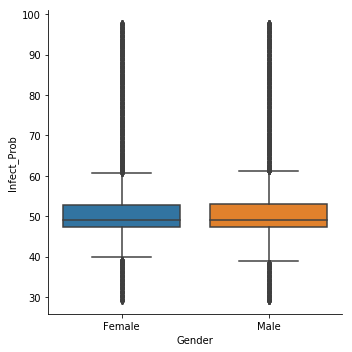

In [9]:
sns.catplot(x="Gender", y="Infect_Prob", kind='box', data=train_df)

In [10]:
missing_val = pd.concat([train_df.isnull().sum(), test_df.isnull().sum()], axis=1, keys=['Train', 'Test'])
missing_val[missing_val.sum(axis=1) > 0]

C:\Users\indra\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


,Train,Test
Children,311,0.0
Diuresis,716,0.0
FT/month,723,0.0
HBB,16,0.0
HDL cholesterol,35,0.0
Heart rate,1114,0.0
Insurance,1090,0.0
Mode_transport,3,0.0
Name,20,32.0
Occupation,747,0.0


In [11]:
train_df = train_df.apply(lambda x:x.fillna(x.value_counts().index[0]))

In [12]:
y=train_df["Infect_Prob"]
X=train_df.iloc[:,0:27]
X_cat=X.iloc[:,[1,2,3,5,7,8,11,14,15]]
X_cont=X.iloc[:,[0,6,9,10,12,13,16,17,18,19,20,21,22,23,24,25,26]]
X.drop(['Name'],axis=1,inplace=True)

In [13]:
train_df.isnull().sum()

people_ID                 0
Region                    0
Gender                    0
Designation               0
Name                      0
Married                   0
Children                  0
Occupation                0
Mode_transport            0
cases/1M                  0
Deaths/1M                 0
comorbidity               0
Age                       0
Coma score                0
Pulmonary score           0
cardiological pressure    0
Diuresis                  0
Platelets                 0
HBB                       0
d-dimer                   0
Heart rate                0
HDL cholesterol           0
Charlson Index            0
Blood Glucose             0
Insurance                 0
salary                    0
FT/month                  0
Infect_Prob               0
dtype: int64

In [14]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
label_x = LabelEncoder()

In [15]:
X_cat.iloc[:,0]=label_x.fit_transform(X_cat.iloc[:,0])
X_cat.iloc[:,1]=label_x.fit_transform(X_cat.iloc[:,1])
X_cat.iloc[:,2]=label_x.fit_transform(X_cat.iloc[:,2])
X_cat.iloc[:,3]=label_x.fit_transform(X_cat.iloc[:,3])
X_cat.iloc[:,4]=label_x.fit_transform(X_cat.iloc[:,4])
X_cat.iloc[:,5]=label_x.fit_transform(X_cat.iloc[:,5])
X_cat.iloc[:,6]=label_x.fit_transform(X_cat.iloc[:,6])
X_cat.iloc[:,7]=label_x.fit_transform(X_cat.iloc[:,7])
X_cat.iloc[:,8]=label_x.fit_transform(X_cat.iloc[:,8])

C:\Users\indra\Anaconda3\lib\site-packages\pandas\core\indexing.py:630: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item_labels[indexer[info_axis]]] = value
C:\Users\indra\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [16]:
X_cat.head()

,Region,Gender,Designation,Married,Occupation,Mode_transport,comorbidity,Pulmonary score,cardiological pressure
0,1,0,1,1,4,1,2,3,1
1,1,0,1,1,4,2,1,0,3
2,1,0,1,0,1,1,3,2,0
3,1,0,1,1,3,0,0,1,2
4,1,0,1,0,6,0,1,3,1


In [17]:
X_cont.head()

,people_ID,Children,cases/1M,Deaths/1M,Age,Coma score,Diuresis,Platelets,HBB,d-dimer,Heart rate,HDL cholesterol,Charlson Index,Blood Glucose,Insurance,salary,FT/month
0,1,1.0,2,0,68,8,441.0,154.0,93.0,233.0,82.0,58.0,27,7,3600000.0,1300000,2.0
1,2,2.0,2,0,64,15,390.0,121.0,56.0,328.0,89.0,68.0,5,6,1600000.0,400000,1.0
2,3,1.0,2,0,19,13,416.0,124.0,137.0,213.0,77.0,43.0,40,6,3400000.0,900000,1.0
3,4,1.0,2,0,33,9,410.0,98.0,167.0,275.0,64.0,60.0,27,7,700000.0,2300000,1.0
4,5,2.0,2,0,23,7,390.0,21.0,153.0,331.0,71.0,64.0,32,7,3200000.0,1100000,1.0


In [18]:
x=np.zeros((10714,26))

In [19]:
x[:,0:9]=X_cat
x[:,9:26]=X_cont

In [20]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [21]:
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor(n_estimators = 300, random_state = 42)
rfr.fit(X_train,y_train)

C:\Users\indra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=1,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

In [22]:
y_pred=rfr.predict(X_test)
from sklearn.metrics import mean_squared_error
from math import sqrt
rms = sqrt(mean_squared_error(y_pred,y_test))

In [23]:
rms

8.796861897693876

In [24]:
X_test=test_df.iloc[:,0:27]
XT_cat=X_test.iloc[:,[1,2,3,5,7,8,11,14,15]]
XT_cont=X_test.iloc[:,[0,6,9,10,12,13,16,17,18,19,20,21,22,23,24,25,26]]
X_test.drop(['Name'],axis=1,inplace=True)

In [25]:
XT_cat.iloc[:,0]=label_x.fit_transform(XT_cat.iloc[:,0])
XT_cat.iloc[:,1]=label_x.fit_transform(XT_cat.iloc[:,1])
XT_cat.iloc[:,2]=label_x.fit_transform(XT_cat.iloc[:,2])
XT_cat.iloc[:,3]=label_x.fit_transform(XT_cat.iloc[:,3])
XT_cat.iloc[:,4]=label_x.fit_transform(XT_cat.iloc[:,4])
XT_cat.iloc[:,5]=label_x.fit_transform(XT_cat.iloc[:,5])
XT_cat.iloc[:,6]=label_x.fit_transform(XT_cat.iloc[:,6])
XT_cat.iloc[:,7]=label_x.fit_transform(XT_cat.iloc[:,7])
XT_cat.iloc[:,8]=label_x.fit_transform(XT_cat.iloc[:,8])

C:\Users\indra\Anaconda3\lib\site-packages\pandas\core\indexing.py:630: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item_labels[indexer[info_axis]]] = value
C:\Users\indra\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [26]:
XT_cat.head()

,Region,Gender,Designation,Married,Occupation,Mode_transport,comorbidity,Pulmonary score,cardiological pressure
0,0,0,1,1,3,1,1,1,2
1,0,1,0,1,5,2,1,1,2
2,0,0,1,1,8,0,1,0,3
3,0,0,1,1,8,0,3,2,0
4,0,0,1,1,0,0,1,1,2


In [27]:
XT_cont.head()

,people_ID,Children,cases/1M,Deaths/1M,Age,Coma score,Diuresis,Platelets,HBB,d-dimer,Heart rate,HDL cholesterol,Charlson Index,Blood Glucose,Insurance,salary,FT/month
0,5942,2,4,1,52,3,388,153,196,240,85,53,17,3,3900000,1300000,1
1,18664,2,4,1,53,11,409,95,138,241,81,61,2,5,1800000,1300000,1
2,5603,2,4,1,35,9,440,40,166,236,88,47,24,3,5000000,2000000,2
3,5649,2,4,1,31,12,206,78,83,211,87,52,13,6,3100000,600000,2
4,5099,2,4,1,51,6,229,109,207,312,94,68,39,5,2300000,1500000,1


In [32]:
x_test=np.zeros((14498,26))

In [35]:
x_test[:,0:9]=XT_cat
x_test[:,9:26]=XT_cont

In [36]:
yt_pred=rfr.predict(x_test)

In [38]:
submission = pd.DataFrame({ "people_ID": test_df["people_ID"],
                            "Infect_Prob": yt_pred })
submission.to_csv('submission.csv', index=False)